### MNIST database of handwritten digits

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255 # 픽셀의 최대값이 255이므로 255로 나눠서 스케일링

### 모델 생성
OneHot Encoding 대신에 손실 함수 **sparse_categorical_crossentropy** 을 이용해준다  

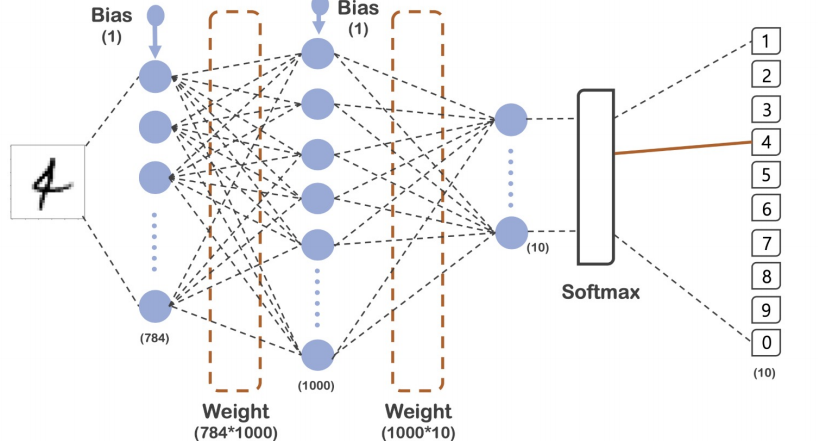

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time

hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, batch_size=100, verbose=1 )

Epoch 1/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0861 - accuracy: 0.9740 - val_loss: 0.0818 - val_accuracy: 0.9749
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0697 - val_accuracy: 0.9784
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0366 - accuracy: 0.9893 - val_loss: 0.0587 - val_accuracy: 0.9822
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0258 - accuracy: 0.9924 - val_loss: 0.0618 - val_accuracy: 0.9807
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0183 - accuracy: 0.9948 - val_loss: 0.0623 - val_accuracy: 0.9828
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0669 - val_accuracy: 0.9813
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.0711 - val_accuracy: 0.9805
Epoch 

In [ ]:
import matplotlib.pyplot as plt

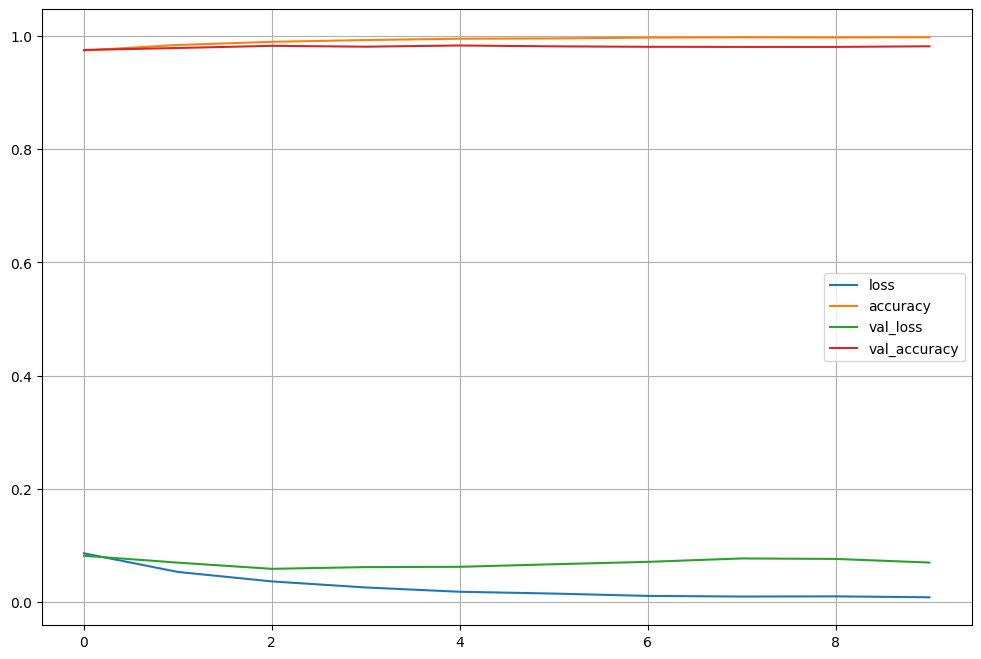

In [ ]:
plot_target = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12,8))
for each in plot_target:
  plt.plot(hist.history[each])

plt.grid()
plt.legend(plot_target)
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test)
score

313/313 [==============================] - 1s 4ms/step - loss: 0.0698 - accuracy: 0.9814


[0.06984681636095047, 0.9814000129699707]

### 결과 확인

In [ ]:
import numpy as np

In [ ]:
predicted_result = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
#0.99999 확률로 7인 수
predicted_result[0]

array([3.7143352e-10, 4.3178858e-10, 2.9585712e-10, 3.3190058e-06,
       2.0779830e-12, 6.6891874e-11, 2.9610419e-15, 9.9999666e-01,
       4.1313983e-11, 4.6481560e-08], dtype=float32)

In [ ]:
predicted_label = np.argmax(predicted_result, axis = 1)
predicted_label[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
wrong_result = []

for n in range(0, len(y_test)):
  if predicted_label[n]!=y_test[n]:
    wrong_result.append(n)


print('틀린 개수  : ',len(wrong_result) )

틀린 개수  :  186


In [ ]:
import random

In [ ]:
samples = random.choices(population = wrong_result, k=10)

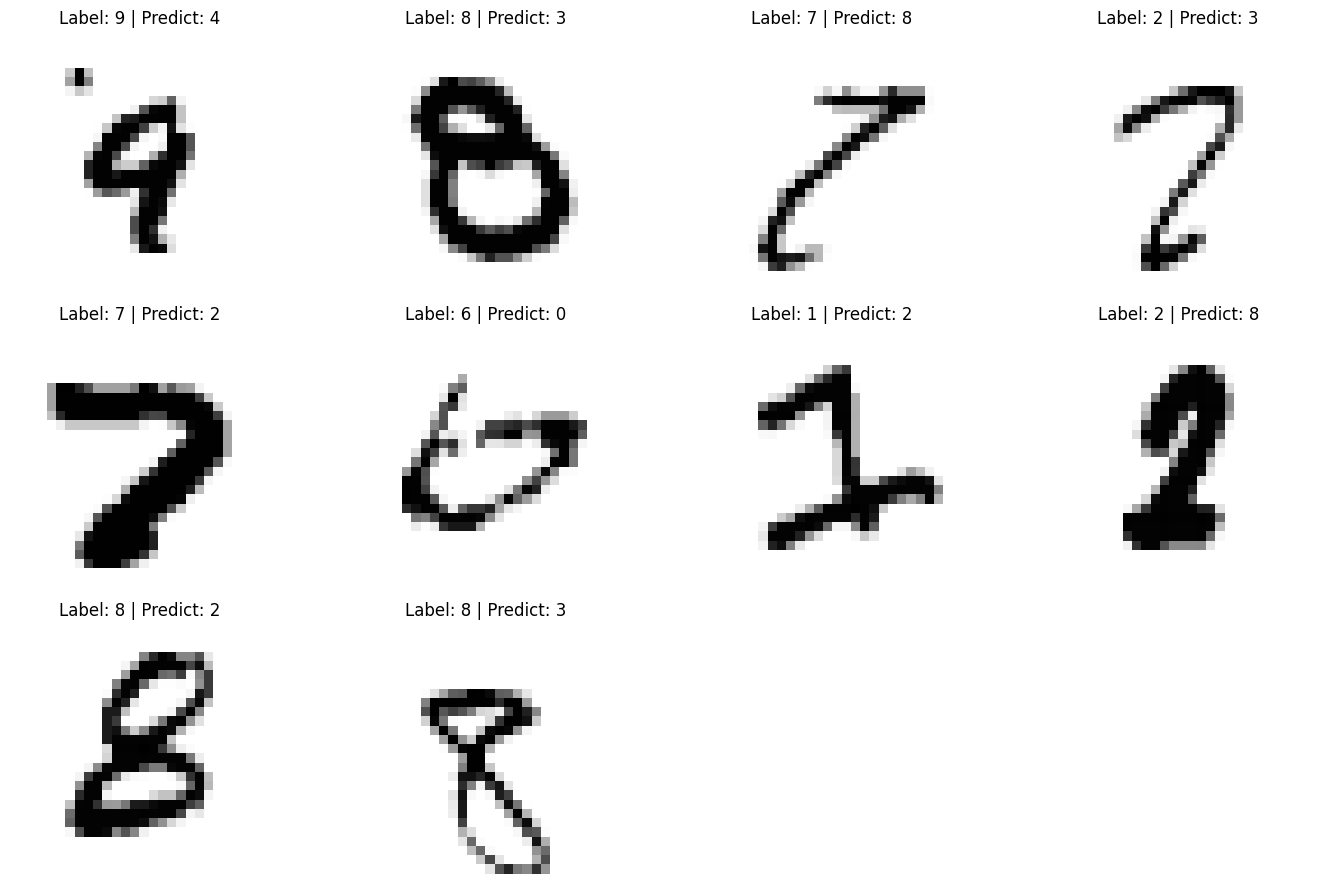

In [ ]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
  plt.title('Label: ' + str(y_test[n]) + ' | Predict: ' + str(predicted_label[n]))
  plt.axis('off')

plt.tight_layout()  # 서브플롯 간의 간격을 조정합니다
plt.show()

###  MNIST database of fashin

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255, X_test/255

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
samples = random.choices(population=range(0, len(y_train)), k=16)

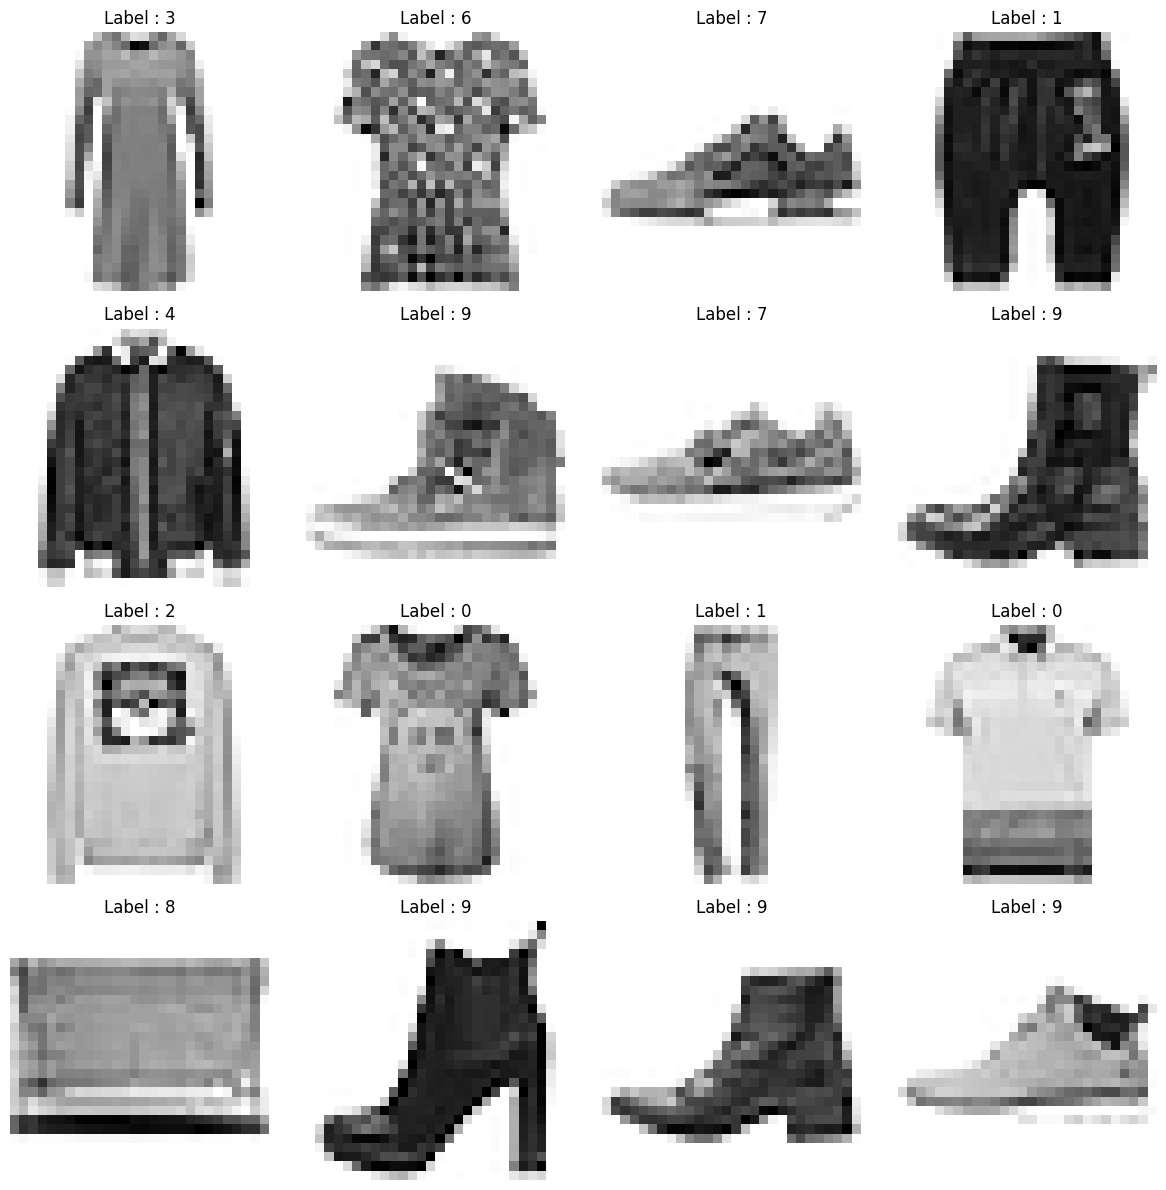

In [ ]:
plt.figure(figsize=(12, 12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_train[n].reshape(28,28), cmap='Greys')
  plt.title('Label : '+str(y_train[n]))
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
%%time

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose = 1)

Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: 0.5251 - accuracy: 0.8311 - val_loss: 0.4134 - val_accuracy: 0.8518
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3389 - accuracy: 0.8781 - val_loss: 0.3944 - val_accuracy: 0.8592
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3048 - accuracy: 0.8895 - val_loss: 0.3591 - val_accuracy: 0.8714
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2825 - accuracy: 0.8964 - val_loss: 0.3480 - val_accuracy: 0.8771
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2667 - accuracy: 0.9012 - val_loss: 0.3455 - val_accuracy: 0.8742
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2513 - accuracy: 0.9072 - val_loss: 0.3201 - val_accuracy: 0.8870
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2393 - accuracy: 0.9119 - val_loss: 0.3367 - val_accuracy: 0.8784
Epoch 

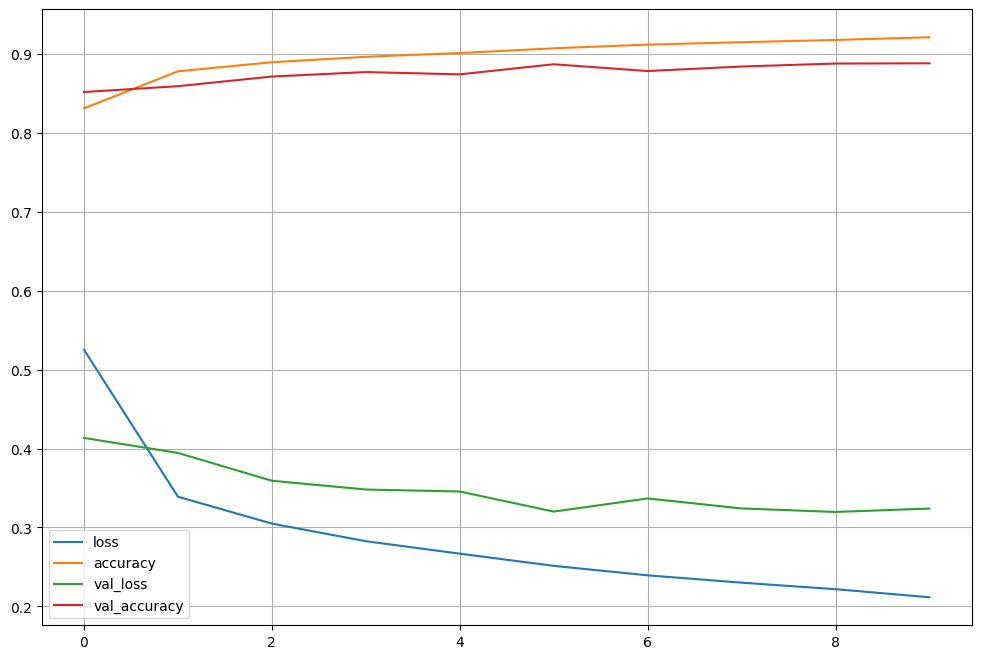

In [ ]:
plot_target = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12,8))
for each in plot_target:
  plt.plot(hist.history[each])

plt.grid()
plt.legend(plot_target)
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test)
score

313/313 [==============================] - 2s 6ms/step - loss: 9.9254 - accuracy: 0.1022


[9.925447463989258, 0.10220000147819519]